# Homework 3

Michael Roussell

GSU CSC 4370

Fall 2021

#### NOTE: All python work was done in Python 3.8.12, so please use the linux/unix version of the interpritor for the most accurate results. 
---------------------------------------

## Question 1

Firstly, we must define what logistic regression and the Bernoulli distrabution are in order to firmly express in detail how logistic regression is derived from Bernoulli the distrabution. 
With this, we can use the binary response case to simplify the decisions. This is the core concept of which A Bernoulli distribution is base. 

As defined in the slides, "a Bernoulli distribution is a discrete probablility distribution for a Bernoulli trial - a random experiment that hjas only two outcomes )usually called a 'Success' or a 'Failure')."
More formally, we can say that the Bernoulli distribution is the discrete probablity distibution of a random variable for which the value 1, probability p, and the value 0 with probability q = 1 - p.
Then P(X=1) = p = 1 - P(X=0) = 1 - q. 
Where P(X=1) + P(X=0) = 1.

Now defining logistic regression we must first look at some other core definitions.
Firstly, we look at the definitions of odds and odds ratio.
Defining as,

    1. odds = P( occuring ) / P( not occuring ),
    2. and odds ratio = (P_1 / (1 - P_1)) / (P_0 / (1 - P_0))

The odds ratio then for a variable in logistic regression represents how the odds change with a 1 unit increase in that variable holding all other variables constant.

Now to tie this together we need a function that links linear combination and the essence of the Bernoulli distribution
This can be done by using that natural log of the odds or "logit".
Doing so maps the linear combination of variables that could result in any value with a domain off [0,1]. And thus we gain,

    ln(odd) -> ln(p/(1-p)) which is the logit(p) function.

This then allows for,

    logit(p) = ln(p/(1-p)) = B_0 + B_1*X_1 B_2*X_2 + ... + B_n*X_n , for some integer n = 1,2,...,n

Then we gain the equation for logistic regression from the above.
From here we can simplify to the simpliest case with,

    log(p(x)/(1-p(x))) = B_0 + B_1*X

Then solving for p we get,

    p(x) = (e^(B_0 + B_1*X) / (1 + e^(B_0 + B_1*X))) = 1 / (1 + e^-(B_0 + B_1*X)))

With this we have shown with quite some depth as to how logistic regression is derived from the Bernoulli distribution.

Now, as for when to apply logistic regression as opposed to linear regression. 
We can look at this a few ways. 
But to start off, let us look at when to use linear regression.
Linear regression is used when the  dependent variable is continuous given a set of independent features.
This means that the problem to apply linear regression to is that of regression, specifically regression problems with linear trends or relationships.
Logistic regression on the other hand is used for classification problems, specifically binary classification problems that fit into the concept of the Bernoulli distribution. 
So if the categoies of outputs fits into a Success/Fail, Yes/No, or 0/1 type of classification problem and not a linear relationship, then logistic regression is the correct regression algorithm to apply.

## Question 2

To explain about Precision and Recall, first we can go about defining what they are.
Precision is defined to be,

    Precision = TP / (TP + FP)

Where TP is True Positive and FP is False Positive.
Precision attempts to answer what proportion of postive indentification was actually correct.

Recall is defined to be,

    Recall = TP / (TP + FN)

Where TP is True Prositive and FN is Flase Negative.
Recall attempts to answer what proportion of actual postivies was identified correctly.

Now looking more at the base of these concepts we must define what True, False, Negative and Positive are in their combinations.
A True Positive is an outcome where the model makes a correct prediction for the postive class.
A True Negative is an outcome where the model makes a correct prediction about the negative class.
A False Positive is an outcome where the model makes an incorrect prediction about the positive class.
A False Negative is an outcome where the model makes an incorrect prediction about the negative class.

With these we can begin to get a picture of what Precision and Recall aim to provide for data. Both Precision and Recall are used in classification and the effectiveness of a classification model. Precision and Recall are also usually opposed, meaning to improve one the other is typically reduced. For example, if the goal is to improve precision, recall would typically be reduced. This is true in the oppostite situation as well. To improve Recall usually Precision is reduced.

With all of this being said, the main purpose for Precision and Recall is to measure the success of a prediction when the classes are imbalanced.




## Number 3

In [94]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss
import seaborn as sns

In [95]:
# import data to DataFrame
hearts_df = pd.read_csv('Data/heart.csv')

# Seperate into independent and dependent variables
y = hearts_df['target']
X = hearts_df.drop('target', axis=1)

# Split int test and train sections 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/opt/homebrew/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


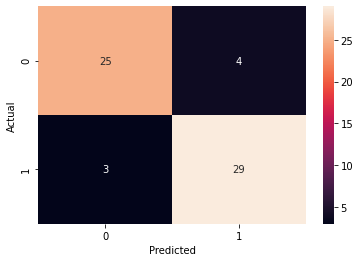

In [96]:
# Set Up Heat Map for Preformnce Test
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]


In [97]:
# Performance Tests
accuracy = metrics.accuracy_score(y_pred, y_test)
print('accuracy: ', accuracy)
misclassification = 1 - accuracy
print('misclassification: ', misclassification)
sensitivity = TP/(TP+FN)
print('sensitivity: ', sensitivity)
specificity = TN/(TN+FP)
print('specificity: ', specificity)
print("Positive Predictive Value: ", TP/(TP+FP))
print("Negative Predictive Value: ", TN/(TN+FN))
print("Positive Likelihood Ratio: ", sensitivity/(1-specificity) )
print("Negative Likelihood Ratio: ", (1-sensitivity)/specificity )

accuracy:  0.8852459016393442
misclassification:  0.11475409836065575
sensitivity:  0.8787878787878788
specificity:  0.8928571428571429
Positive Predictive Value:  0.90625
Negative Predictive Value:  0.8620689655172413
Positive Likelihood Ratio:  8.202020202020206
Negative Likelihood Ratio:  0.13575757575757574


## Number 4

### Logistic Regression Equation:

    p = 1/ 1 + e^ -(b0 + b1(SPHEQ))

where X = SPHEQ and y is the target MYOPIC.

### Logit Transform Equation:

    logit(p) - log(p/(1-p))

where p is the probablity of occurance,

In [98]:
# import MYOPIA data into DataFrame
myopia_df = pd.read_csv('Data/MYOPIA.csv')
SPHEQ_data = np.array(myopia_df['SPHEQ'])
MYOPIC_data = np.array(myopia_df['MYOPIC'])

In [99]:
# Function to find logistic regression and output coef, intercept, y_pred, y_test, probability, and confusion_matrix
def logistic_regression(X , y):
    x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
    logreg = LogisticRegression()
    logreg.fit(x_train.reshape(-1,1),y_train)
    y_pred = logreg.predict(x_test.reshape(-1,1))
    prob = logreg.predict_proba(x_test.reshape(-1,1))

    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

    return logreg.coef_, logreg.intercept_, y_pred, y_test, prob, confusion_matrix

In [100]:
# Function to find log likely hood give y_pred and y_true
def log_likelihood(y_pred, y_true):
    return -log_loss(y_true, y_pred)*len(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0]
log likelihood:  -656.2511442570467
model slope:  [[-3.15927299]]
model intercept:  [-0.23155743]


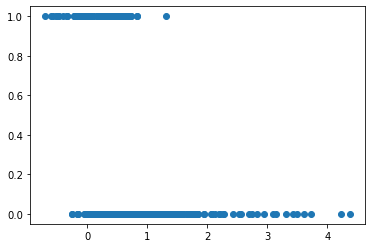

Probabilities: 
 [[9.65785166e-01 3.42148335e-02]
 [9.10506653e-01 8.94933472e-02]
 [9.10506653e-01 8.94933472e-02]
 [9.91335683e-01 8.66431685e-03]
 [9.70637816e-01 2.93621836e-02]
 [7.79280852e-01 2.20719148e-01]
 [9.87968426e-01 1.20315737e-02]
 [7.83597362e-01 2.16402638e-01]
 [6.02237133e-01 3.97762867e-01]
 [9.92211246e-01 7.78875383e-03]
 [9.39526996e-01 6.04730036e-02]
 [9.32335255e-01 6.76647450e-02]
 [9.33128129e-01 6.68718711e-02]
 [9.40063244e-01 5.99367565e-02]
 [9.44195562e-01 5.58044378e-02]
 [9.71349628e-01 2.86503717e-02]
 [9.00513555e-01 9.94864447e-02]
 [7.13164072e-01 2.86835928e-01]
 [9.45349417e-01 5.46505833e-02]
 [6.20251965e-01 3.79748035e-01]
 [8.80543925e-01 1.19456075e-01]
 [6.67293789e-01 3.32706211e-01]
 [9.49136992e-01 5.08630080e-02]
 [9.97350909e-01 2.64909139e-03]
 [9.46640580e-01 5.33594197e-02]
 [5.40424928e-01 4.59575072e-01]
 [9.60284104e-01 3.97158957e-02]
 [9.99991301e-01 8.69869096e-06]
 [9.39706242e-01 6.02937576e-02]
 [9.86951854e-01 1.3048145

In [101]:
# Perform Regression
coef, intercept, y_test,y_pred, probabilitys, confusion_matrix = logistic_regression(SPHEQ_data, MYOPIC_data)
print(y_pred)
# Display Regression information. 
print("log likelihood: ", log_likelihood(y_pred, y_test))
print("model slope: ", coef)
print("model intercept: ", intercept)
plt.scatter(SPHEQ_data, MYOPIC_data)
plt.show()
print("Probabilities: \n", probabilitys)

## Number 5

### a)

#### Logistic Regression Equation:

    p = 1/ 1 + e^ -(b0 + b1(AGE))

where X = AGE and y is the target STA.

#### Logit Transform Equation:

    logit(p) - log(p/(1-p))

where p is the probablity of occurance,

### c)

#### Likelihood Equation:

    L = P(Theta|X)

#### log-likelihood equation:

    log_likelihood = -log_loss(y_true, y_pred)*len(y_true) = log(L(A)/ L(B))

In [102]:
# import ICU data into DataFrame
icu_df = pd.read_csv('Data/icu.csv')
AGE_data = np.array(icu_df['AGE'])
STA_data = np.array(icu_df['STA'])
print(AGE_data)

[16 16 17 17 17 18 18 18 18 19 19 19 19 20 20 20 20 20 21 21 21 23 23 23
 23 24 25 27 28 30 31 32 32 34 35 35 36 40 40 40 40 41 41 41 42 45 45 46
 46 46 47 47 47 48 48 48 49 49 49 50 50 50 51 51 52 53 53 53 54 54 55 55
 55 55 55 55 55 55 57 57 58 58 59 59 59 60 60 60 60 60 60 60 61 61 61 61
 62 62 63 63 63 63 63 64 64 64 64 64 64 65 65 65 65 66 66 66 66 66 67 67
 67 67 67 68 68 68 68 68 68 69 69 69 69 69 69 69 70 70 70 70 70 70 71 71
 71 71 71 71 72 72 72 72 72 73 73 73 73 74 74 75 75 75 75 75 75 75 75 76
 76 76 76 77 77 77 77 77 77 78 78 78 78 79 80 80 80 82 82 83 84 85 87 87
 88 88 88 88 89 91 91 92]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
model slope:  [[0.03447665]]
model intercept:  [-3.85015459]


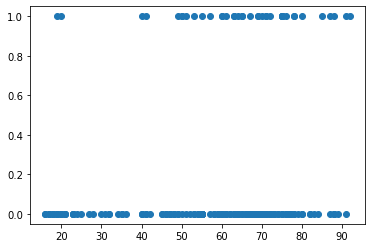

Probabilities: 
 [[0.95795841 0.04204159]
 [0.77380615 0.22619385]
 [0.83803083 0.16196917]
 [0.84265616 0.15734384]
 [0.76150996 0.23849004]
 [0.74876236 0.25123764]
 [0.96193219 0.03806781]
 [0.80255056 0.19744944]
 [0.9606494  0.0393506 ]
 [0.79703024 0.20296976]
 [0.89343534 0.10656466]
 [0.81842935 0.18157065]
 [0.76150996 0.23849004]
 [0.79139571 0.20860429]
 [0.86418683 0.13581317]
 [0.96193219 0.03806781]
 [0.93571282 0.06428718]
 [0.81324967 0.18675033]
 [0.92209    0.07791   ]
 [0.87587548 0.12412452]
 [0.74876236 0.25123764]
 [0.80255056 0.19744944]
 [0.90876975 0.09123025]
 [0.77978359 0.22021641]
 [0.89343534 0.10656466]
 [0.81842935 0.18157065]
 [0.76150996 0.23849004]
 [0.73556999 0.26443001]
 [0.82349654 0.17650346]
 [0.91698998 0.08301002]
 [0.95932521 0.04067479]
 [0.89982443 0.10017557]
 [0.79703024 0.20296976]
 [0.83329643 0.16670357]
 [0.95509199 0.04490801]
 [0.71496858 0.28503142]
 [0.81324967 0.18675033]
 [0.96317476 0.03682524]
 [0.86008933 0.13991067]
 [0.8380

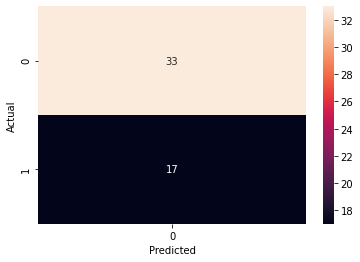

In [103]:
# Perform Regression
coef, intercept, y_test,y_pred, probabilitys, confusion_matrix = logistic_regression(AGE_data, STA_data)
print(y_test)
# Display Regression information. 
print("model slope: ", coef)
print("model intercept: ", intercept)
plt.scatter(AGE_data, STA_data)
plt.show()
sns.heatmap(confusion_matrix, annot=True)
print("Probabilities: \n", probabilitys)

### e)

The plots seem to show that Logistic regression is not a good first for a machine learning algorithm for this data. This is because logistic regression does not only require the Bernouli Distrabution, but also a point in the data where the data gravitates towards only 1 and the same for 0. If this is not present in the data, thus logistic regression will be a bad fit for this. 